## Naive Bayes

Naive Bayes is one of the most common ML algorithms that is often used for the purpose of text classification.
It is a probabilistic classification algorithm as it uses probability to get the base accuracy of the dataset.

**Formula:**
- **c** represents the class
- **x** represents features calculated individually

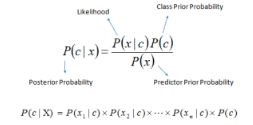

- P(c|x) is the posterior probability of class c given predictor ( features).
- P(c) is the probability of class.
- P(x|c) is the likelihood which is the probability of predictor given class.
- P(x) is the prior probability of predictor.

**Naive Bayes explained on an example:**

Let’s say we have data on 1000 pieces of fruit. The fruit being a Banana, Orange or some other fruit and imagine we know 3 features of each fruit, whether it’s long or not, sweet or not and yellow or not, as displayed in the table below.

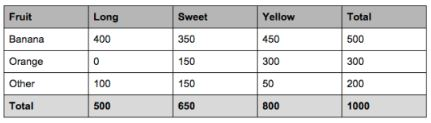

So from the table what do we already know?

- 50% of the fruits are bananas
- 30% are oranges
- 20% are other fruits

Based on our training set we can also say the following:

- From 500 bananas 400 (0.8) are Long, 350 (0.7) are Sweet and 450 (0.9) are Yellow
- Out of 300 oranges, 0 are Long, 150 (0.5) are Sweet and 300 (1) are Yellow
- From the remaining 200 fruits, 100 (0.5) are Long, 150 (0.75) are Sweet and 50 (0.25) are Yellow
Which should provide enough evidence to predict the class of another fruit as it’s introduced.

So let’s say we’re given the features of a piece of fruit and we need to predict the class. If we’re told that the additional fruit is Long, Sweet and Yellow, we can classify it using the following formula and subbing in the values for each outcome, whether it’s a Banana, an Orange or Other Fruit. The one with the highest probability (score) being the winner.
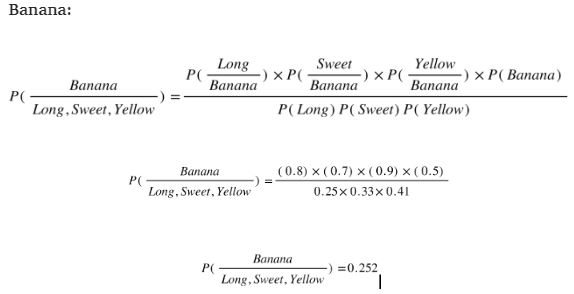
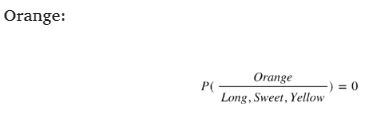
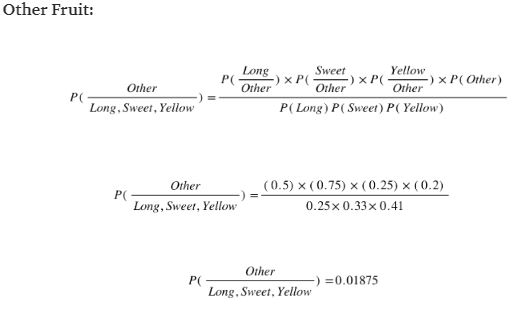
In this case, based on the higher score ( 0.252 for banana ) we can assume this Long, Sweet and Yellow fruit is in fact, a Banana.

**Great sources:**
- https://towardsdatascience.com/all-about-naive-bayes-8e13cef044cf
- https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34
- https://www.youtube.com/watch?v=l3dZ6ZNFjo0&list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy&index=23
- https://scikit-learn.org/stable/modules/naive_bayes.html


### Example: text classification of News Headlines

In [1]:
# Loading the Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

In [2]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
categories = data.target_names

# Training the data on these categories
train = fetch_20newsgroups(subset="train", categories=categories)

# Testing the data for these categories
test = fetch_20newsgroups(subset="test", categories=categories)

# Printing training data
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [4]:
# Import Necessary Packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Creating a model based on Multinomial NB
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Training the model, with the train data
model.fit(train.data, train.target)

# Creating labels for the test data
labels = model.predict(test.data)

Text(92.68,0.5,'Predicted Label')

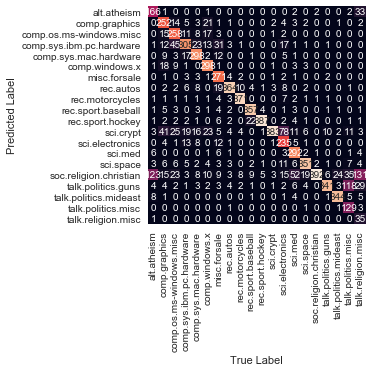

In [5]:
# Creating confusion matrix and heat map
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False, 
           xticklabels=train.target_names, yticklabels=train.target_names)

# Plotting Heatmap of Confusion Matrix
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

In [6]:
# Predicting category on new data based on trained model
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [7]:
predict_category("Jesus Christ")

'soc.religion.christian'

In [8]:
predict_category("Sending load to International Space Station")

'sci.space'

In [9]:
predict_category("BMW is better then Audi")

'rec.autos'

In [10]:
predict_category("President of India")

'talk.politics.misc'

### Example: Amazon review - cool walkthorough (with SVM also at the end to compare)

In [11]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

**Set random seed**

This is used to reproduce the same result every time if the script is kept consistent otherwise each run will produce different results. The seed can be set to any number.

In [12]:
np.random.seed(500)

In [13]:
# Encoding set to ‘latin-1’ as the text had many special characters.
Corpus = pd.read_csv("data/corpus.csv",encoding='latin-1')

**Data pre-processing**

-  Tokenization: This is a process of breaking a stream of text up into words, phrases, symbols, or other meaningful elements called tokens. The list of tokens becomes input for further processing. NLTK Library has word_tokenize and sent_tokenize to easily break a stream of text into a list of words or sentences, respectively.
-  Word Stemming/Lemmatization: The aim of both processes is the same, reducing the inflectional forms of each word into a common base or root. Lemmatization is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.
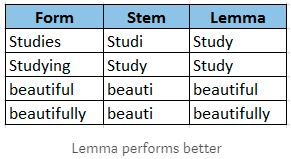

In [14]:
# Step - a : Remove blank rows if any.
Corpus['text'].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['text'] = [entry.lower() for entry in Corpus['text']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['text']= [word_tokenize(entry) for entry in Corpus['text']]


In [15]:
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

**Prepare Train and Test Data sets**
The Corpus will be split into two data sets, Training and Test. The training data set will be used to fit the model and the predictions will be performed on the test data set.This can be done through the train_test_split from the sklearn library. The Training Data will have 70% of the corpus and Test data will have the remaining 30% as we have set the parameter test_size=0.3

In [16]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['label'],test_size=0.3)

**Encoding**
Label encode the target variable — This is done to transform Categorical data of string type in the data set into numerical values which the model can understand.

In [17]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

**Word Vectorization**
It is a general process of turning a collection of text documents into numerical feature vectors.Their are many methods to convert text data to vectors which the model can understand but by far the most popular method is called TF-IDF. This is an acronym than stands for “Term Frequency — Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

- Term Frequency: This summarizes how often a given word appears within a document.
- Inverse Document Frequency: This down scales words that appear a lot across documents.

Without going into the math, TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents.

The following syntax can be used to first fit the TG-IDF model on the whole corpus. This will help TF-IDF build a vocabulary of words which it has learned from the corpus data and it will assign a unique integer number to each of these words. Their will be maximum of 5000 unique words/features as we have set parameter max_features=5000.

Finally we will transform Train_X and Test_X to vectorized Train_X_Tfidf and Test_X_Tfidf. These will now contain for each row a list of unique integer number and its associated importance as calculated by TF-IDF.

In [18]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

You can use the below syntax to see the vocabulary that it has learned from the corpus:

In [19]:
print(Tfidf_vect.vocabulary_)

{'stun': 4271, 'even': 1529, 'sound': 4116, 'track': 4556, 'beautiful': 387, 'paint': 3160, 'mind': 2839, 'well': 4865, 'would': 4951, 'recomend': 3598, 'people': 3225, 'hate': 2054, 'video': 4763, 'game': 1855, 'music': 2925, 'play': 3298, 'cross': 1032, 'ever': 1533, 'best': 427, 'back': 330, 'away': 320, 'crude': 1035, 'take': 4371, 'fresh': 1812, 'step': 4210, 'guitar': 2004, 'soulful': 4113, 'orchestra': 3101, 'impress': 2245, 'anyone': 203, 'care': 645, 'listen': 2611, 'soundtrack': 4118, 'anything': 204, 'read': 3564, 'lot': 2655, 'review': 3721, 'say': 3840, 'figure': 1694, 'write': 4957, 'disagree': 1238, 'bit': 449, 'ultimate': 4633, 'masterpiece': 2756, 'timeless': 4506, 'year': 4976, 'beauty': 389, 'simply': 4011, 'refuse': 3621, 'price': 3407, 'tag': 4370, 'pretty': 3402, 'must': 2931, 'go': 1927, 'buy': 604, 'cd': 676, 'much': 2916, 'money': 2878, 'one': 3079, 'feel': 1671, 'worth': 4947, 'every': 1535, 'penny': 3224, 'amaze': 152, 'favorite': 1660, 'time': 4505, 'hand': 

And you can directly print the vectorized data to see how it looks like:

In [20]:
print(Train_X_Tfidf)

  (0, 4506)	0.3763188267807246
  (0, 4505)	0.15031494427382475
  (0, 3976)	0.35868777245753825
  (0, 3890)	0.2515140235472667
  (0, 3860)	0.2690675584422277
  (0, 3745)	0.34695623926050195
  (0, 3655)	0.2896999547088821
  (0, 3564)	0.29449641491430995
  (0, 2931)	0.229683025366997
  (0, 1935)	0.13406125327954532
  (0, 1529)	0.17761496997588844
  (0, 521)	0.321056290554803
  (0, 491)	0.12303572865008613
  (0, 240)	0.2448559358109696
  (1, 4687)	0.21384275526442909
  (1, 4060)	0.3566872275481094
  (1, 3434)	0.21279175847748263
  (1, 3313)	0.8157357261127677
  (1, 2592)	0.2173336717856602
  (1, 1260)	0.2074693534878867
  (1, 604)	0.1614401835472762
  (2, 4734)	0.18368024895699514
  (2, 4625)	0.15009324791624393
  (2, 4466)	0.10284196288022608
  (2, 4191)	0.1168175572462934
  :	:
  (6998, 2523)	0.11512525241790023
  (6998, 2125)	0.13650351320774795
  (6998, 1971)	0.07126979525506368
  (6998, 1778)	0.22013576217543665
  (6998, 1746)	0.19935227823153098
  (6998, 1710)	0.13509114757747032
  (

Now our data sets are ready to be fed into different classification Algorithms.

**Naive Bayes Classifier Algorithm**

In [21]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  83.23333333333333


***Support Vector Machine***

In [22]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  84.66666666666667
